In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 4
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('Data/Movie-Ratings-Data.csv')

In [3]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [4]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

### Histograms
Distplots are used to visualize the uni-variate distribution.

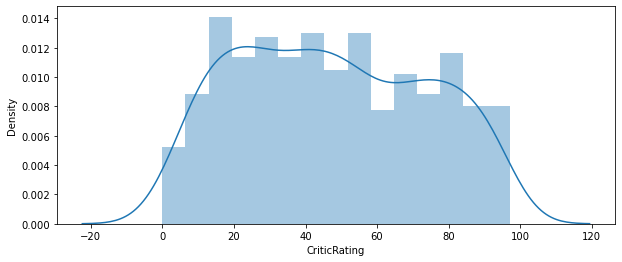

In [5]:
viz1 = sns.distplot(movies.CriticRating, bins = 15)

We can see that critics rate a movie based on so many factors and hence the ratings are uniformly distributed and lower ratings are more common.

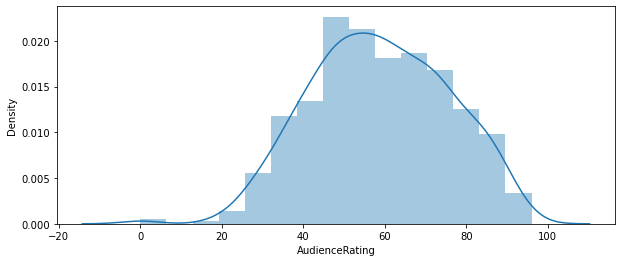

In [6]:
viz2 = sns.distplot(movies.AudienceRating, bins = 15)

We can see that audience rate a movie purely based on their liking and preferences and hence the ratings are normaly distributed and higher ratings are more common.

### Stacked Histograms

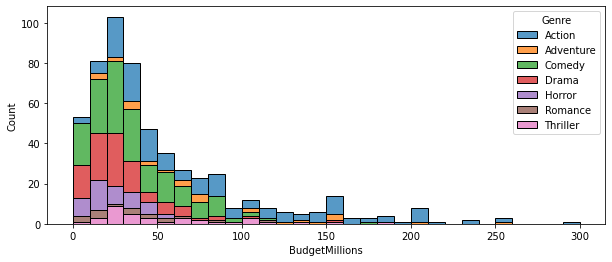

In [7]:
viz3 = sns.histplot(data = movies, multiple = "stack", x = "BudgetMillions", hue = "Genre", legend = True, bins = 30)

If the stacked histogram needs to be created using matplotlib.pyplot, then additional steps are required.

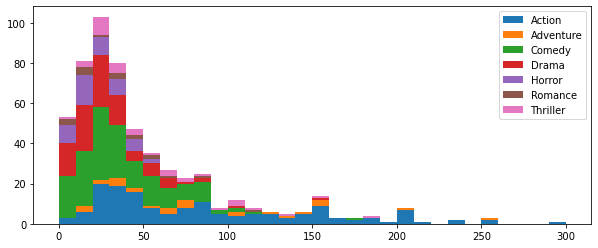

In [8]:
list_budget = list()
list_label = list()

for genre in movies.Genre.cat.categories:
    list_budget.append(movies[movies.Genre == genre].BudgetMillions)
    list_label.append(genre)

plt.hist(list_budget, stacked = True, bins = 30, label = list_label)
plt.legend()
plt.show()

### KDEPlots
Kernal Density Estimate is something similar to the distribution. It shows how of the data is contributing to the whole dataset at a particular data point.

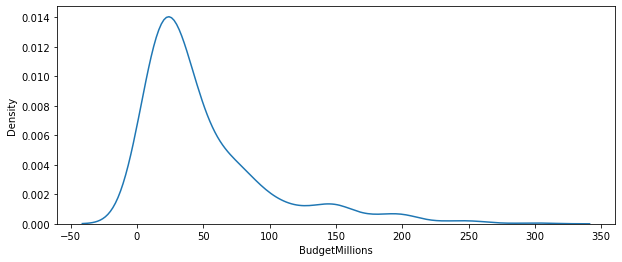

In [9]:
viz4 = sns.kdeplot(data = movies.BudgetMillions)

From the above plot, it is evident that most of the data lies in the range of about 20-30. Let's check with a histogram.

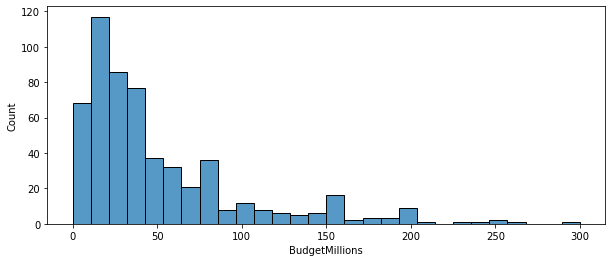

In [10]:
viz5 = sns.histplot(data = movies.BudgetMillions)

As expected, the data in the range of 20-30 has the highest count.

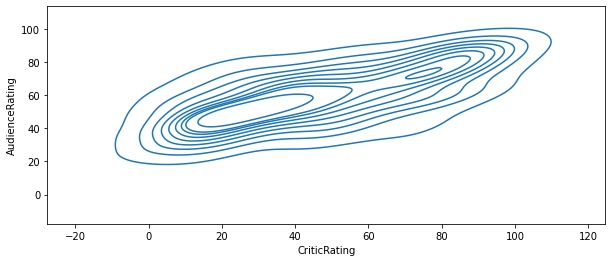

In [11]:
viz6 = sns.kdeplot(data = movies, x = 'CriticRating', y = 'AudienceRating')

The above plot shows the KDE for bi-variate distribution.<br>
We can create a better KDE plots using some parameters.

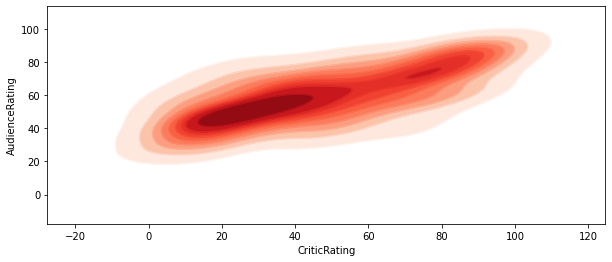

In [12]:
viz7 = sns.kdeplot(data = movies, x = 'CriticRating', y = 'AudienceRating', fill = True, cmap = 'Reds', shade_lowest = False)
viz7s = sns.kdeplot(data = movies, x = 'CriticRating', y = 'AudienceRating', cmap = 'Reds') #this acts as a overlay to
                                                                                            #smooth the edges 

### JointPlots
Jointplots are used to derive relationship and visualize a bi-variant distribution.<br>
It shows an inner plot as well as a histogram on the axes.

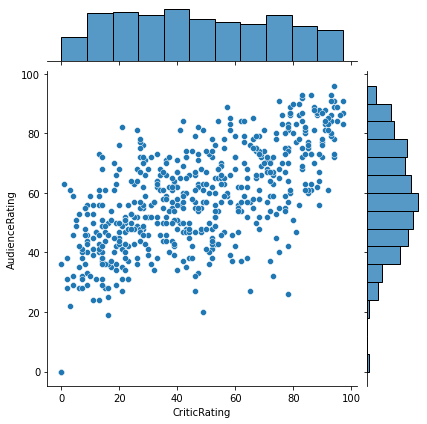

In [13]:
viz8 = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating')

From the above graph, we can see that there are few clusters, like critic-audience ratings of around 20:40, another around 70-60 and another around 90-80. Also, critic ratings have few spikes at 20, 40 and 70, while audience ratings have spikes at 50, 70.
However, the clusters are not clearly infered.

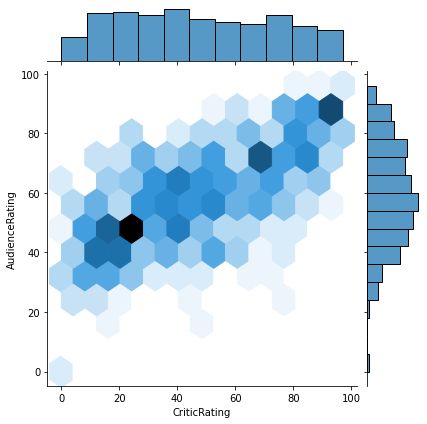

In [14]:
#by default jointplot uses scatterplot but this can be changed to other types
viz9 = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'hex')
#this hex chart shows clusters

From the above graph, we can clearly see the clusters (dark coloured hexes), like critic-audience ratings of around 30-30,40,50; another around 70-70 and another around 90-90. The most crowded cluster being critic-audience ratings of 30-50.

Trying out other jointplots - kde | hist | reg | resid

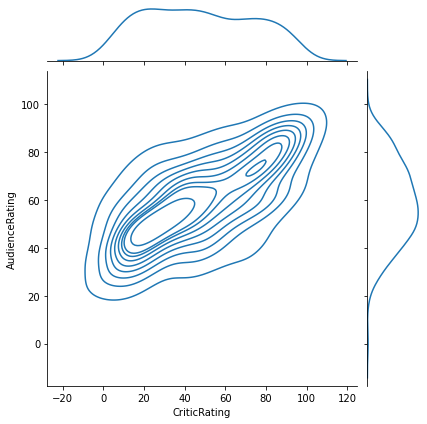

In [15]:
viz10 = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'kde')

The above jointplot with 'kde' plots a kernel density estimate in the margins and converts the interior into a shaded countour plot.

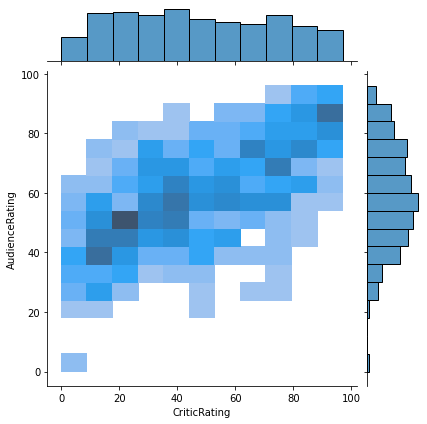

In [16]:
viz11 = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'hist')

The above jointplot with 'hist' plots the bi-variate histogram in the interior and individual histograms on the margins.

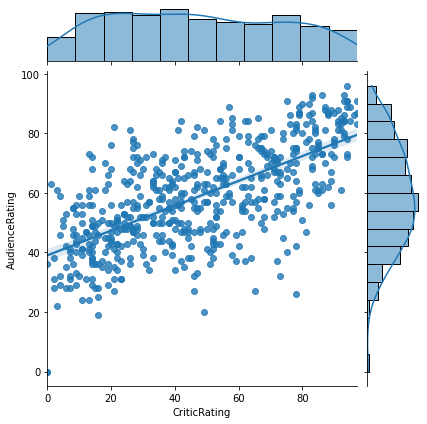

In [17]:
viz12 = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'reg')

The above jointplot plots a linear regression line. We can infer from the linear regression line that the two variables are positively correlated.

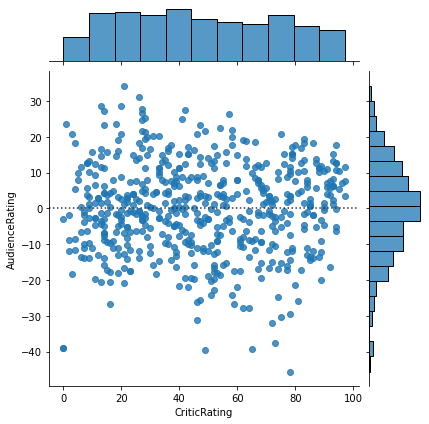

In [18]:
viz13 = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'resid')

The above jointplot plots the residual of the data to the regression line.<br>
Residuals: Given a data point and the regression line, the residual is defined by the vertical difference between the observed value of *y* and the computed value of *y^* based on the equation of the regression line:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;Residual=y−y^

### Box Plots

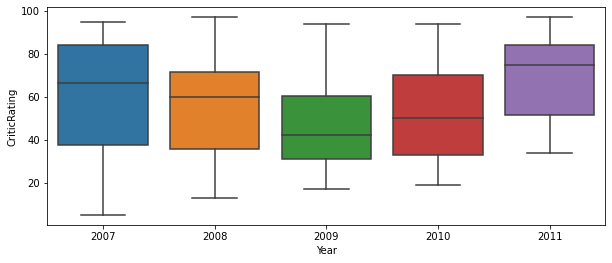

In [19]:
viz14 = sns.boxplot(data = movies[movies.Genre == 'Drama'], x = 'Year', y = 'CriticRating')

Box plots are the most used plots to give the overall idea of the distribution of the data. Boxplots give quartile-wise data and the whiskers are 1.5 times the IQR on either side.<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **IQR = Q3 - Q1**

### Violin Plots

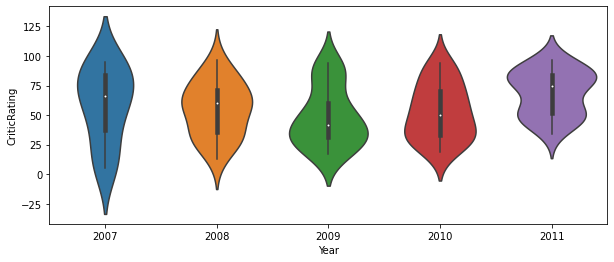

In [21]:
viz14 = sns.violinplot(data = movies[movies.Genre == 'Drama'], x = 'Year', y = 'CriticRating')

Violin plots are similar to box plots but give a more detailed insights of how data is concentrated. The bumps convey that the data is more concentrated.